In [88]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import os
import sys 

sys.path.append('..')
import open3d_tutorial as o3dtut
o3dtut.interactive = not "CI" in os.environ

In [89]:
color_raw = o3d.io.read_image('./saved_images/image.jpg')
depth_raw = o3d.io.read_image('./saved_images/depth_map.jpg')
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
                                            color_raw, depth_raw)
print(rgbd_image)

RGBDImage of size 
Color image : 1280x720, with 1 channels.
Depth image : 1280x720, with 1 channels.
Use numpy.asarray to access buffer data.


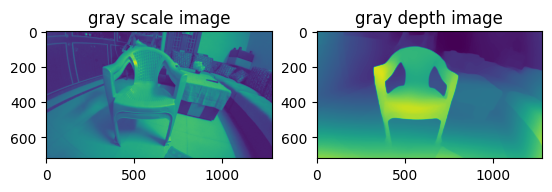

In [90]:
plt.subplot(1,2,1)
plt.title('gray scale image')
plt.imshow(rgbd_image.color)
plt.subplot(1,2,2)
plt.title('gray depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [91]:
import open3d as o3d
import copy
flip_transform = [[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]]

def draw_geometries_flip(pcds):
    pcds_transform = []
    for pcd in pcds:
        pcd_temp = copy.deepcopy(pcd)
        pcd_temp.transform(flip_transform)
        pcds_transform.append(pcd_temp)
    o3d.visualization.draw_geometries(pcds_transform)
    
pinhole_camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(
    o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image, 
    pinhole_camera_intrinsic)
pcd.transform([[1,0,0,0], [0,-1,0,0], [0,0,-1,0], [0,0,0,1]])

# Convert the point cloud to a list before passing it to draw_geometries
draw_geometries_flip([pcd])
